In [44]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e33f4ecf-5239-41e9-a651-c04e7dc418aa',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-18T11:23:34.374Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 10112}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11114, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [45]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
df = pd.json_normalize(data['data'])
df['timestamp']=pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11114,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19713912.00000,19713912.00000,False,NaN,1,NaN,NaN,None,2024-06-18T11:21:00.000Z,65248.75597,35081554996.76602,82.14860,-0.28495,-0.90807,-2.63458,-2.82424,0.71816,3.27361,1286308233217.66821,54.83900,1370223875280.11011,None,2024-06-18T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 13:23:45.343369
1,1027,Ethereum,ETH,ethereum,9068,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122276991.71219,122276991.71219,True,NaN,2,NaN,NaN,None,2024-06-18T11:21:00.000Z,3407.47157,19162114531.10504,34.59770,-0.48896,-3.25923,-3.58477,10.02950,9.94808,4.76764,416655372732.68530,17.75790,416655372732.69000,None,2024-06-18T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 13:23:45.343369
2,825,Tether USDt,USDT,tether,88865,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112552589019.02098,116084537290.51714,True,NaN,3,NaN,NaN,None,2024-06-18T11:21:00.000Z,0.99979,71651123093.43762,60.99100,-0.00292,0.04549,0.06501,-0.02944,-0.10619,0.03471,112528509554.70586,4.79600,116059702202.34000,None,2024-06-18T11:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-18 13:23:45.343369
3,1839,BNB,BNB,bnb,2183,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583972.38736,147583972.38736,False,NaN,4,NaN,NaN,None,2024-06-18T11:21:00.000Z,583.96163,2098996226.16308,34.12630,-0.40800,-2.34665,-3.54235,0.78066,4.37210,10.08819,86183377700.59494,3.67650,86183377700.59000,None,2024-06-18T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 13:23:45.343369
4,5426,Solana,SOL,solana,689,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,461792686.30978,578311839.57155,True,NaN,5,NaN,NaN,None,2024-06-18T11:21:00.000Z,137.02482,3415993610.72445,102.14720,-0.25442,-4.67366,-11.28606,-20.29533,-5.53494,-20.22642,63277059040.53568,2.69690,79243074871.61000,None,2024-06-18T11:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 13:23:45.343369
5,3408,USDC,USDC,usd-coin,19775,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32620764347.20204,32620764347.20204,False,NaN,6,NaN,NaN,None,2024-06-18T11:21:00.000Z,0.99995,6648748422.93172,69.05050,0.00049,-0.01007,-0.00079,-0.00419,-0.02462,0.00251,32619228726.57423,1.39020,32619228726.57000,None,2024-06-18T11:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-18 13:23:45.343369
6,52,XRP,XRP,xrp,1341,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55570463728.00000,99987531962.00000,False,NaN,7,NaN,NaN,None,2024-06-18T11:22:00.000Z,0.49479,2412794019.40563,103.79960,-0.67469,-0.44058,1.99331,-4.41609,-1.10543,-17.07729,27495973467.16376,1.17380,49479474567.19000,None,2024-06-18T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 13:23:45.343369
7,11419,Toncoin,TON,toncoin,425,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2438090727.42235,5107753652.47796,True,NaN,8,3414166606.00000,24635039259.95304,None,2024-06-18T11:21:00.000Z,7.21554,435856599.67232,37.12440,-0.81008,-6.85895,5.51065,11.76476,1.53840,78.05912,17592129418.58911,0.74980,36855176176.18000,None,2024-

In [104]:
#pd.set_option('float_format', 
#creating a function to automate data pull
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'25',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e33f4ecf-5239-41e9-a651-c04e7dc418aa',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df_append = pd.DataFrame(df)
    df = pd.concat([df, df_append])

    #creating a csv file to insert the data into
    if not os.path.isfile(r"C:\Users\Makunyane\Desktop\Portfolio\Crypto_API.csv"):
        df.to_csv(r"C:\Users\Makunyane\Desktop\Portfolio\Crypto_API.csv", header = "column_names")
    else:
        df.to_csv(r"C:\Users\Makunyane\Desktop\Portfolio\Crypto_API.csv", mode ='a', header = False)

In [103]:
import os
from time import time
from time import sleep


for i in range (333):
    api_runner()
    print('API runner ran successfully')
    sleep(60)
exit()

API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully
API runner ran successfully


KeyboardInterrupt: 

In [89]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [105]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11114,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19713928.00000,19713928.00000,False,NaN,1,NaN,NaN,None,2024-06-18T12:20:00.000Z,65200.97879,35688433634.07052,82.73900,-0.06232,-0.78875,-2.75570,-2.77500,-0.23456,1.99229,1285367401465.40723,54.98300,1369220554664.37012,None,2024-06-18T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 14:21:17.335950
1,1027,Ethereum,ETH,ethereum,9068,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122276991.71219,122276991.71219,True,NaN,2,NaN,NaN,None,2024-06-18T12:19:00.000Z,3397.39521,19434837655.74107,34.38020,-0.34442,-3.60783,-3.88886,9.77769,9.17342,1.80707,415423265595.07184,17.76170,415423265595.07001,None,2024-06-18T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 14:21:17.335950
2,825,Tether USDt,USDT,tether,88883,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112552589019.02098,116084537290.51714,True,NaN,3,NaN,NaN,None,2024-06-18T12:19:00.000Z,0.99981,72600751920.76366,60.36580,0.00167,0.05878,0.07316,-0.06671,-0.09999,0.02201,112531683626.98959,4.81140,116062975878.36000,None,2024-06-18T12:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-18 14:21:17.335950
3,1839,BNB,BNB,bnb,2183,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583967.84646,147583967.84646,False,NaN,4,NaN,NaN,None,2024-06-18T12:19:00.000Z,581.08517,2141570465.32510,36.66340,-0.47827,-2.86768,-4.72378,0.11051,3.39994,8.23959,85758855391.01549,3.66980,85758855391.02000,None,2024-06-18T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 14:21:17.335950
4,5426,Solana,SOL,solana,689,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,461792497.20223,578311650.46400,True,NaN,5,NaN,NaN,None,2024-06-18T12:19:00.000Z,136.06822,3466934011.53948,101.04520,-0.75530,-5.28008,-11.61409,-20.31318,-5.83783,-21.89462,62835283925.14799,2.68660,78689837912.66000,None,2024-06-18T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 14:21:17.335950
5,3408,USDC,USDC,usd-coin,19776,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32641177403.90741,32641177403.90741,False,NaN,6,NaN,NaN,None,2024-06-18T12:19:00.000Z,0.99994,6732436144.69927,67.32010,-0.00135,-0.01040,-0.00616,-0.04396,-0.02893,-0.01538,32639132425.58714,1.39550,32639132425.59000,None,2024-06-18T12:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-18 14:21:17.335950
6,52,XRP,XRP,xrp,1341,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55570463728.00000,99987531962.00000,False,NaN,7,NaN,NaN,None,2024-06-18T12:20:00.000Z,0.49435,2411337237.18865,101.13430,-0.14430,-1.06282,2.23089,-4.27896,-1.43397,-17.25108,27471180013.28896,1.17450,49434858322.85000,None,2024-06-18T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-18 14:21:17.335950
7,11419,Toncoin,TON,toncoin,426,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2438092238.39646,5107755176.41282,True,NaN,8,3414166606.00000,24503385988.65372,None,2024-06-18T12:19:00.000Z,7.17697,441891488.57683,36.31270,-0.59624,-7.88753,4.73572,11.38285,9.25200,69.45663,17498125337.05310,0.74810,36658227634.01000,None,2024-

In [106]:
df2 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06232,-0.78875,-2.75570,-2.77500,-0.23456,1.99229
Ethereum,-0.34442,-3.60783,-3.88886,9.77769,9.17342,1.80707
Tether USDt,0.00167,0.05878,0.07316,-0.06671,-0.09999,0.02201
BNB,-0.47827,-2.86768,-4.72378,0.11051,3.39994,8.23959
Solana,-0.75530,-5.28008,-11.61409,-20.31318,-5.83783,-21.89462
USDC,-0.00135,-0.01040,-0.00616,-0.04396,-0.02893,-0.01538
XRP,-0.14430,-1.06282,2.23089,-4.27896,-1.43397,-17.25108
Toncoin,-0.59624,-7.88753,4.73572,11.38285,9.25200,69.45663
Dogecoin,-0.73678,-11.19502,-15.50850,-21.19107,-21.78029,-11.76199


In [107]:
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.06232
             quote.USD.percent_change_24h    -0.78875
             quote.USD.percent_change_7d     -2.75570
             quote.USD.percent_change_30d    -2.77500
             quote.USD.percent_change_60d    -0.23456
             quote.USD.percent_change_90d     1.99229
Ethereum     quote.USD.percent_change_1h     -0.34442
             quote.USD.percent_change_24h    -3.60783
             quote.USD.percent_change_7d     -3.88886
             quote.USD.percent_change_30d     9.77769
             quote.USD.percent_change_60d     9.17342
             quote.USD.percent_change_90d     1.80707
Tether USDt  quote.USD.percent_change_1h      0.00167
             quote.USD.percent_change_24h     0.05878
             quote.USD.percent_change_7d      0.07316
             quote.USD.percent_change_30d    -0.06671
             quote.USD.percent_change_60d    -0.09999
             quote.USD.percent_change_90

In [108]:
df4 = df3.to_frame(name = 'values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.06232
            quote.USD.percent_change_24h  -0.78875
            quote.USD.percent_change_7d   -2.75570
            quote.USD.percent_change_30d  -2.77500
            quote.USD.percent_change_60d  -0.23456
            quote.USD.percent_change_90d   1.99229
Ethereum    quote.USD.percent_change_1h   -0.34442
            quote.USD.percent_change_24h  -3.60783
            quote.USD.percent_change_7d   -3.88886
            quote.USD.percent_change_30d   9.77769
            quote.USD.percent_change_60d   9.17342
            quote.USD.percent_change_90d   1.80707
Tether USDt quote.USD.percent_change_1h    0.00167
            quote.USD.percent_change_24h   0.05878
            quote.USD.percent_change_7d    0.07316
            quote.USD.percent_change_30d  -0.06671
            quote.USD.percent_change_60d  -0.09999
            quote.USD.percent_change_90d   0.02201
BNB         quote.USD.percent_change_1h   -0.47827
            quote.USD.percent_change_24h  -2.86768
            quote.USD.percent_change_7d   -4.72378
            quote.USD.percent_change_30d   0.11051
            quote.USD.percent_change_60d   3.39994
            quote.USD.percent_change_90d   8.23959
Solana      quote.USD.percent_change_1h   -0.75530
            quote.USD.percent_change_24h  -5.28008
            quote.USD.percent_change_7d  -11.61409
            quote.USD.percent_change_30d -20.31318
            quote.USD.percent_change_60d  -5.83783
            quote.USD.percent_change_90d -21.89462
USDC        quote.USD.percent_change_1h   -0.00135
            quote.USD.percent_change_24h  -0.01040
            quote.USD.percent_change_7d   -0.00616
            quote.USD.percent_change_30d  -0.04396
            quote.USD.percent_change_60d  -0.02893
            quote.USD.percent_change_90d  -0.01538
XRP         quote.USD.percent_change_1h   -0.14430
            quote.USD.percent_change_24h  -1.06282
            quote.USD.percent_change_7d    2.23089
            quote.USD.percent_change_30d  -4.27896
            quote.USD.percent_change_60d  -1.43397
            quote.USD.percent_change_90d -17.25108
Toncoin     quote.USD.percent_change_1h   -0.59624
            quote.USD.percent_change_24h  -7.88753
            quote.USD.percent_change_7d    4.73572
            quote.USD.percent_change_30d  11.38285
            quote.USD.percent_change_60d   9.25200
            quote.USD.percent_change_90d  69.45663
Dogecoin    quote.USD.percent_change_1h   -0.73678
            quote.USD.percent_change_24h -11.19502
            quote.USD.percent_change_7d  -15.50850
            quote.USD.percent_change_30d -21.19107
            quote.USD.percent_change_60d -21.78029
            quote.USD.percent_change_90d -11.76199
Cardano     quote.USD.percent_change_1h   -0.31866
            quote.USD.percent_change_24h  -7.84780
            quote.USD.percent_change_7d  -13.23483
            quote.USD.percent_change_30d -21.66402
            quote.USD.percent_change_60d -20.34794
            quote.USD.percent_change_90d -39.16944
Shiba Inu   quote.USD.percent_change_1h   -0.90064
            quote.USD.percent_change_24h -11.14780
            quote.USD.percent_change_7d  -20.36191
            quote.USD.percent_change_30d -27.66947
            quote.USD.percent_change_60d -23.59089
            quote.USD.percent_change_90d -31.84240
Avalanche   quote.USD.percent_change_1h   -0.56468
            quote.USD.percent_change_24h -10.07586
            quote.USD.percent_change_7d  -19.21816
            quote.USD.percent_change_30d -29.31457
            quote.USD.percent_change_60d -27.15381
            quote.USD.percent_change_90d -52.49750
TRON        quote.USD.percent_change_1h    0.04762
            quote.USD.percent_change_24h  -1.31929
            quote.USD.percent_change_7d   -1.70887
            quote.USD.percent_change_30d  -5.09633
            quote.USD.percent_change_60d   5.47741
            quo

In [109]:
df4.count()

values    90
dtype: int64

In [110]:
index = pd.Index(range(90))
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06232
1,Bitcoin,quote.USD.percent_change_24h,-0.78875
2,Bitcoin,quote.USD.percent_change_7d,-2.75570
3,Bitcoin,quote.USD.percent_change_30d,-2.77500
4,Bitcoin,quote.USD.percent_change_60d,-0.23456
5,Bitcoin,quote.USD.percent_change_90d,1.99229
6,Ethereum,quote.USD.percent_change_1h,-0.34442
7,Ethereum,quote.USD.percent_change_24h,-3.60783
8,Ethereum,quote.USD.percent_change_7d,-3.88886
9,Ethereum,quote.USD.percent_change_30d,9.77769


In [111]:
df6 = df5.rename(columns={'level_1' : 'percentage_change','name' : 'Crypto'})
df6

,Crypto,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06232
1,Bitcoin,quote.USD.percent_change_24h,-0.78875
2,Bitcoin,quote.USD.percent_change_7d,-2.75570
3,Bitcoin,quote.USD.percent_change_30d,-2.77500
4,Bitcoin,quote.USD.percent_change_60d,-0.23456
5,Bitcoin,quote.USD.percent_change_90d,1.99229
6,Ethereum,quote.USD.percent_change_1h,-0.34442
7,Ethereum,quote.USD.percent_change_24h,-3.60783
8,Ethereum,quote.USD.percent_change_7d,-3.88886
9,Ethereum,quote.USD.percent_change_30d,9.77769


In [112]:
df6['percentage_change'] = df6['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,Crypto,percentage_change,values
0,Bitcoin,1h,-0.06232
1,Bitcoin,24h,-0.78875
2,Bitcoin,7d,-2.75570
3,Bitcoin,30d,-2.77500
4,Bitcoin,60d,-0.23456
5,Bitcoin,90d,1.99229
6,Ethereum,1h,-0.34442
7,Ethereum,24h,-3.60783
8,Ethereum,7d,-3.88886
9,Ethereum,30d,9.77769


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


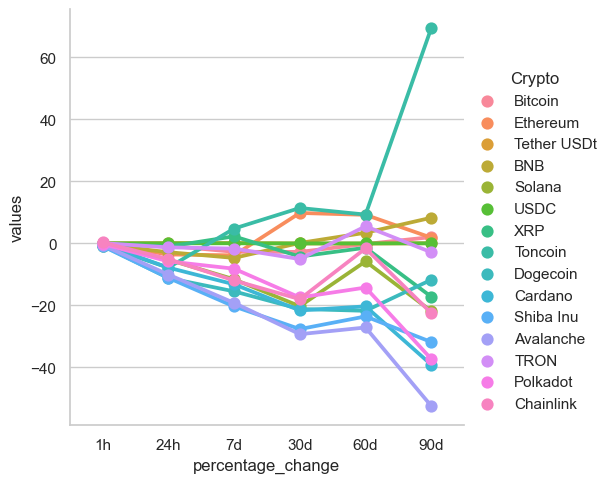

In [114]:
sns.catplot(x ='percentage_change', y = 'values', hue = 'Crypto', data = df6, kind = 'point')

In [115]:
df7 = df[['name', 'quote.USD.price', 'timestamp']]
df7

,name,quote.USD.price,timestamp
0,Bitcoin,65200.97879,2024-06-18 14:21:17.335950
1,Ethereum,3397.39521,2024-06-18 14:21:17.335950
2,Tether USDt,0.99981,2024-06-18 14:21:17.335950
3,BNB,581.08517,2024-06-18 14:21:17.335950
4,Solana,136.06822,2024-06-18 14:21:17.335950
5,USDC,0.99994,2024-06-18 14:21:17.335950
6,XRP,0.49435,2024-06-18 14:21:17.335950
7,Toncoin,7.17697,2024-06-18 14:21:17.335950
8,Dogecoin,0.11937,2024-06-18 14:21:17.335950
9,Cardano,0.37280,2024-06-18 14:21:17.335950


In [116]:
df8 = df7.query("name == 'Polkadot'")
df8

,name,quote.USD.price,timestamp
13,Polkadot,5.83560,2024-06-18 14:21:17.335950
13,Polkadot,5.83560,2024-06-18 14:21:17.335950


C:\Users\Makunyane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Makunyane\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Makunyane\AppData\Local\Temp\ipykernel_2388\726457531.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 45)


[Text(19174.0, 0, '2022-07'),
 Text(19358.0, 0, '2023-01'),
 Text(19539.0, 0, '2023-07'),
 Text(19723.0, 0, '2024-01'),
 Text(19905.0, 0, '2024-07'),
 Text(20089.0, 0, '2025-01'),
 Text(20270.0, 0, '2025-07'),
 Text(20454.0, 0, '2026-01'),
 Text(20635.0, 0, '2026-07')]

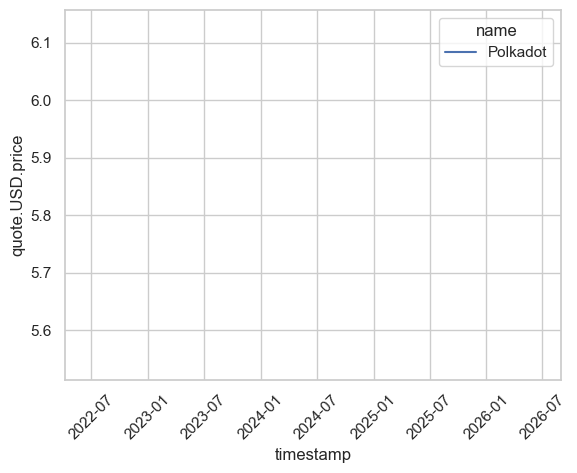

In [118]:
sns.set_theme(style = 'whitegrid')
pd.option_context('mode.use_inf_as_na', False)
axes = sns.lineplot(x='timestamp', y='quote.USD.price', hue ='name', data = df8)
axes.set_xticklabels(axes.get_xticklabels(), rotation = 45)